In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
TRAINING_DIR = "data_1/train"
VALIDATION_DIR = "data_1/test"

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 1314 images belonging to 9 classes.


In [3]:
validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))


Found 325 images belonging to 9 classes.


In [4]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,
                                input_tensor=Input(shape=(150, 150, 3)))

for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output




9406464/9406464 [==============================] - 8s 1us/step


In [11]:
x = tf.keras.layers.Flatten(name="flatten")(last_output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dense(9, activation='softmax')(x)

model = tf.keras.models.Model(pre_trained_model.input, x)

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 75, 75, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 75, 75, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 75, 75, 32)           0         ['bn_Conv1[0][0]']      

In [12]:
int_lr = 1e-4
num_epochs = 30

optimizer = tf.optimizers.Adam(learning_rate=int_lr)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
H = model.fit(train_generator,
              epochs=num_epochs,
              validation_data=validation_generator)


Epoch 1/30
42/42 [==============================] - 39s 709ms/step - loss: 1.8272 - accuracy: 0.4871 - val_loss: 0.7060 - val_accuracy: 0.8062
Epoch 2/30
42/42 [==============================] - 23s 535ms/step - loss: 1.0183 - accuracy: 0.6591 - val_loss: 0.5003 - val_accuracy: 0.8492
Epoch 3/30
42/42 [==============================] - 22s 530ms/step - loss: 0.8404 - accuracy: 0.7260 - val_loss: 0.4363 - val_accuracy: 0.8708
Epoch 4/30
42/42 [==============================] - 23s 539ms/step - loss: 0.7796 - accuracy: 0.7420 - val_loss: 0.4116 - val_accuracy: 0.8738
Epoch 5/30
42/42 [==============================] - 24s 564ms/step - loss: 0.6727 - accuracy: 0.7846 - val_loss: 0.3815 - val_accuracy: 0.8769
Epoch 6/30
42/42 [==============================] - 25s 587ms/step - loss: 0.5838 - accuracy: 0.8067 - val_loss: 0.3650 - val_accuracy: 0.8862
Epoch 7/30
42/42 [==============================] - 27s 641ms/step - loss: 0.5733 - accuracy: 0.8052 - val_loss: 0.3344 - val_accuracy: 0.9138

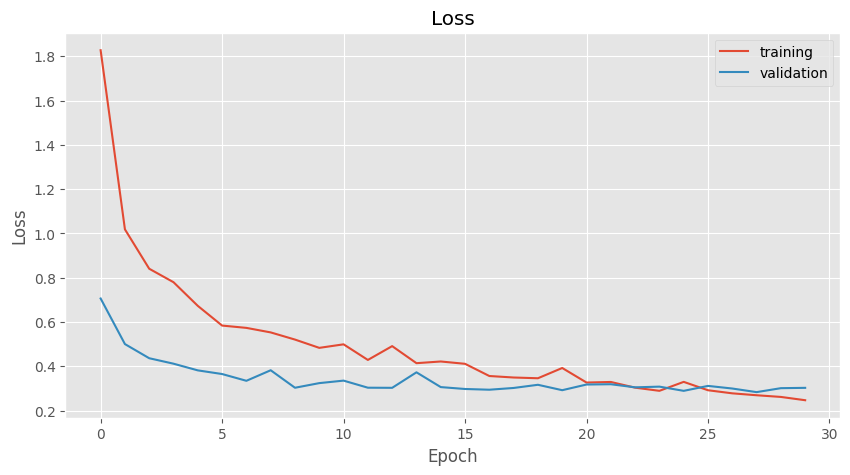

In [14]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


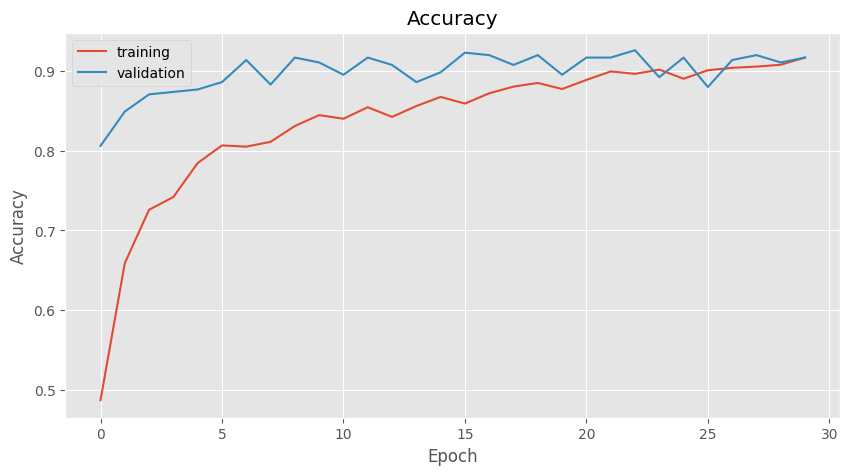

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

## save model


In [17]:
model.save_weights('weights/weights_1-000/weights')

In [19]:
import os
model.save(os.path.join('models/h5', 'explorentt_1.h5'))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
!tensorflowjs_converter --input_format=keras models/h5/explorentt_1.h5 models/h5-tfjs


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\converter.py", line 38, in <module>
    from tensorflowjs.converters import tf_saved_model_conversion_v2
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\tf_saved_model_conversion_v2.py", line 2